# 월간 데이콘 신용카드 사기 거래 탐지 AI 경진대회
- 알고리즘 | 정형 | 분류 | 탐지 | Macro f1 score

In [22]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

pd.set_option('display.max_columns', None) # 전체 열 보기
pd.set_option('display.max_rows', None) # 전체 행 보기

In [25]:
train_df = pd.read_csv('./data/train.csv')
val_df = pd.read_csv('./data/val.csv')

In [28]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113842 entries, 0 to 113841
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      113842 non-null  int64  
 1   V1      113842 non-null  float64
 2   V2      113842 non-null  float64
 3   V3      113842 non-null  float64
 4   V4      113842 non-null  float64
 5   V5      113842 non-null  float64
 6   V6      113842 non-null  float64
 7   V7      113842 non-null  float64
 8   V8      113842 non-null  float64
 9   V9      113842 non-null  float64
 10  V10     113842 non-null  float64
 11  V11     113842 non-null  float64
 12  V12     113842 non-null  float64
 13  V13     113842 non-null  float64
 14  V14     113842 non-null  float64
 15  V15     113842 non-null  float64
 16  V16     113842 non-null  float64
 17  V17     113842 non-null  float64
 18  V18     113842 non-null  float64
 19  V19     113842 non-null  float64
 20  V20     113842 non-null  float64
 21  V21     11

In [18]:
train_df.describe()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
count,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,...,113842.000000,1.138420e+05,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000
mean,142025.527837,0.000197,0.001289,0.009717,-0.004169,0.000475,0.005141,0.005769,-0.002451,-0.002107,...,-0.001242,4.088347e-07,-0.001317,-0.000884,0.001680,-0.000293,-0.000234,-0.000508,0.927253,0.116232
std,82248.545392,1.951060,1.651064,1.496916,1.412633,1.367533,1.330583,1.204111,1.185504,1.095415,...,0.722001,7.238291e-01,0.636061,0.605854,0.520069,0.480979,0.399505,0.356130,3.412933,0.558161
min,3.000000,-56.407510,-72.715728,-32.454198,-5.600607,-42.147898,-26.160506,-41.506796,-50.943369,-13.434066,...,-22.757540,-8.887017e+00,-44.807735,-2.824849,-10.295397,-1.855355,-9.895244,-9.617915,-0.307413,-0.994972
25%,70796.750000,-0.923479,-0.595602,-0.883877,-0.853728,-0.689853,-0.766094,-0.552071,-0.209492,-0.647477,...,-0.229710,-5.402665e-01,-0.162180,-0.355582,-0.315470,-0.326160,-0.070847,-0.053249,-0.230560,-0.360304
50%,141722.000000,0.012074,0.066390,0.183868,-0.019359,-0.054060,-0.272436,0.039036,0.020970,-0.052157,...,-0.030281,8.345807e-03,-0.012261,0.040573,0.018278,-0.052815,0.001502,0.011158,-0.000699,-0.002590
75%,213359.500000,1.315373,0.801687,1.037120,0.742208,0.614214,0.405285,0.568750,0.328303,0.590705,...,0.186001,5.287508e-01,0.147474,0.438225,0.353989,0.240838,0.091279,0.077851,0.768532,0.640653
max,284803.000000,2.454930,21.467203,4.187811,16.491217,34.801666,23.917837,44.054461,20.007208,10.392889,...,27.202839,8.361985e+00,22.528412,4.022866,7.519589,3.119295,11.135740,33.847808,180.101027,1.034951


In [19]:
val_df.describe()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,V29,V30,Class
count,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,...,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000
mean,142549.840138,0.004967,0.002014,0.001414,0.001893,-0.003969,-0.017730,0.005556,0.009023,-0.004905,...,0.001224,0.001490,0.001355,0.002284,0.000520,-0.000520,-0.000265,0.924010,0.119916,0.001054
std,82252.851474,1.930640,1.605198,1.499749,1.405139,1.335147,1.292214,1.165132,1.103538,1.090843,...,0.721350,0.588076,0.603181,0.526864,0.484804,0.394235,0.304284,3.347555,0.558246,0.032449
min,10.000000,-29.516123,-38.305310,-30.177317,-5.071241,-21.577019,-16.172614,-31.197329,-26.278007,-9.462573,...,-8.555808,-25.356744,-2.807897,-6.035054,-1.596493,-9.793568,-8.364853,-0.307413,-0.994878,0.000000
25%,71260.000000,-0.915525,-0.598053,-0.873022,-0.852444,-0.698010,-0.774920,-0.546290,-0.210941,-0.642760,...,-0.542624,-0.160418,-0.352310,-0.322098,-0.328638,-0.071787,-0.052361,-0.226927,-0.357884,0.000000
50%,142683.500000,0.023586,0.075470,0.175784,-0.021619,-0.052780,-0.280742,0.046280,0.022622,-0.066623,...,0.008401,-0.011372,0.040076,0.016684,-0.049583,0.000488,0.012138,0.005589,0.002156,0.000000
75%,213612.750000,1.315578,0.803463,1.011563,0.739044,0.598712,0.377266,0.566825,0.323836,0.596308,...,0.528163,0.146094,0.441402,0.352930,0.241051,0.089100,0.080822,0.778278,0.641828,0.000000
max,284806.000000,2.411769,16.497472,4.226108,12.114672,24.345310,12.128950,26.237722,12.431140,7.937413,...,6.090514,18.946734,3.658746,5.525093,3.067907,8.708972,15.726807,165.948299,1.034975,1.000000


In [30]:
val_df.isna().sum() #결측치 없음

ID       0
V1       0
V2       0
V3       0
V4       0
V5       0
V6       0
V7       0
V8       0
V9       0
V10      0
V11      0
V12      0
V13      0
V14      0
V15      0
V16      0
V17      0
V18      0
V19      0
V20      0
V21      0
V22      0
V23      0
V24      0
V25      0
V26      0
V27      0
V28      0
V29      0
V30      0
Class    0
dtype: int64

## 1. EDA

### (1) 단변량 분석

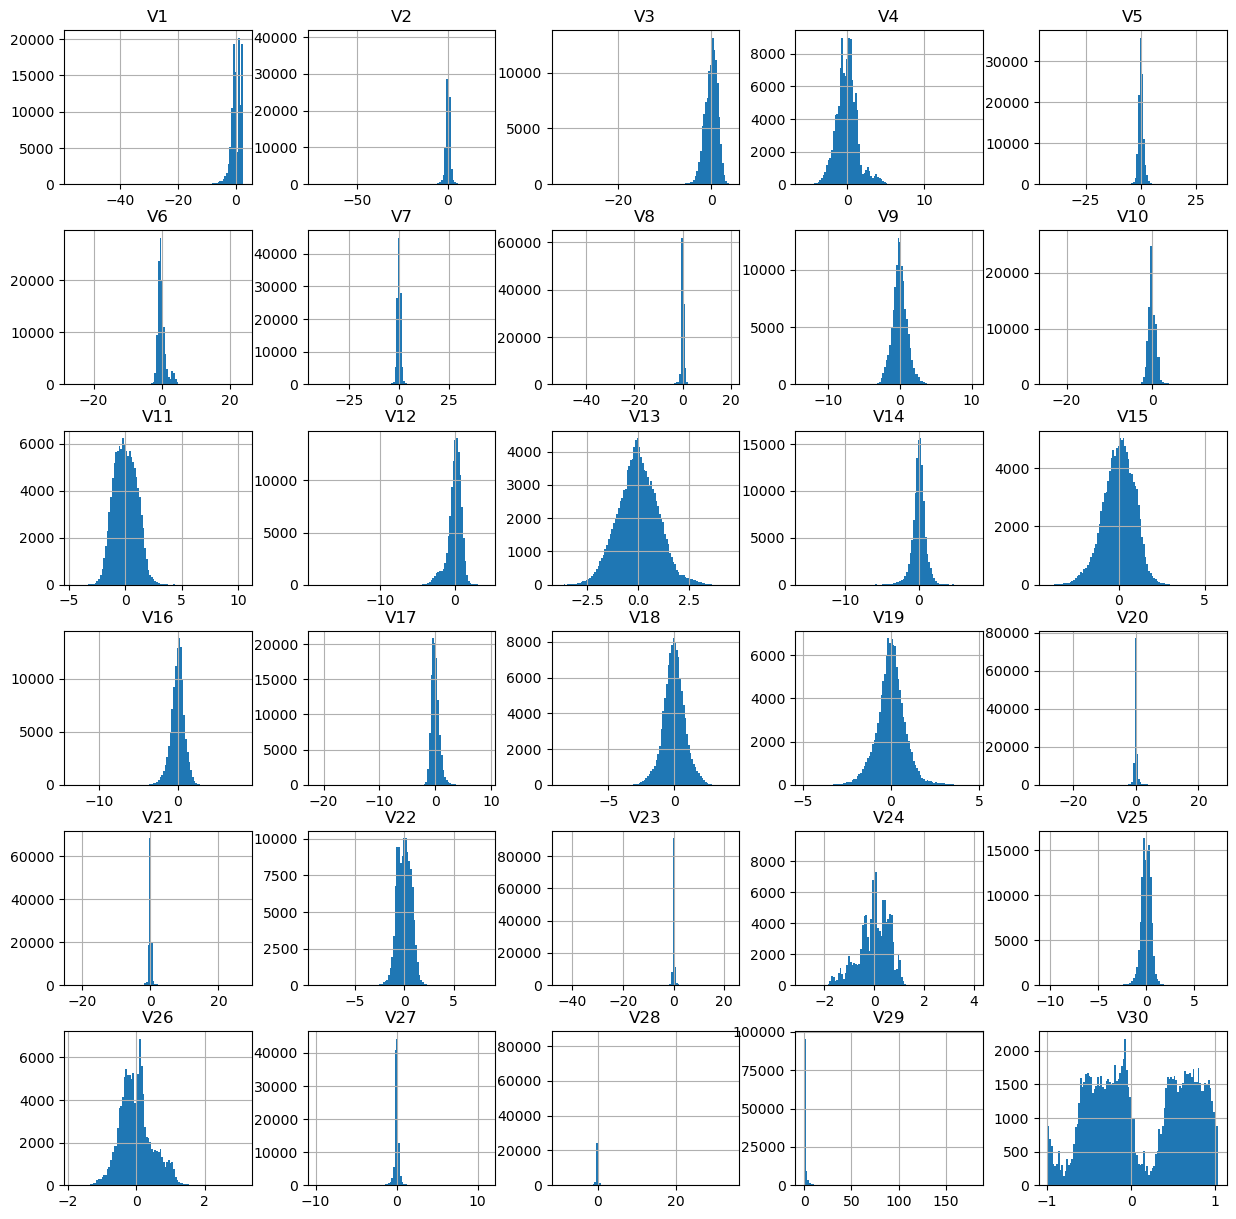

In [32]:
# 각 feature 별 histogram
train_df.drop(columns=['ID']).hist(bins=100,figsize=(15,15))
plt.show()

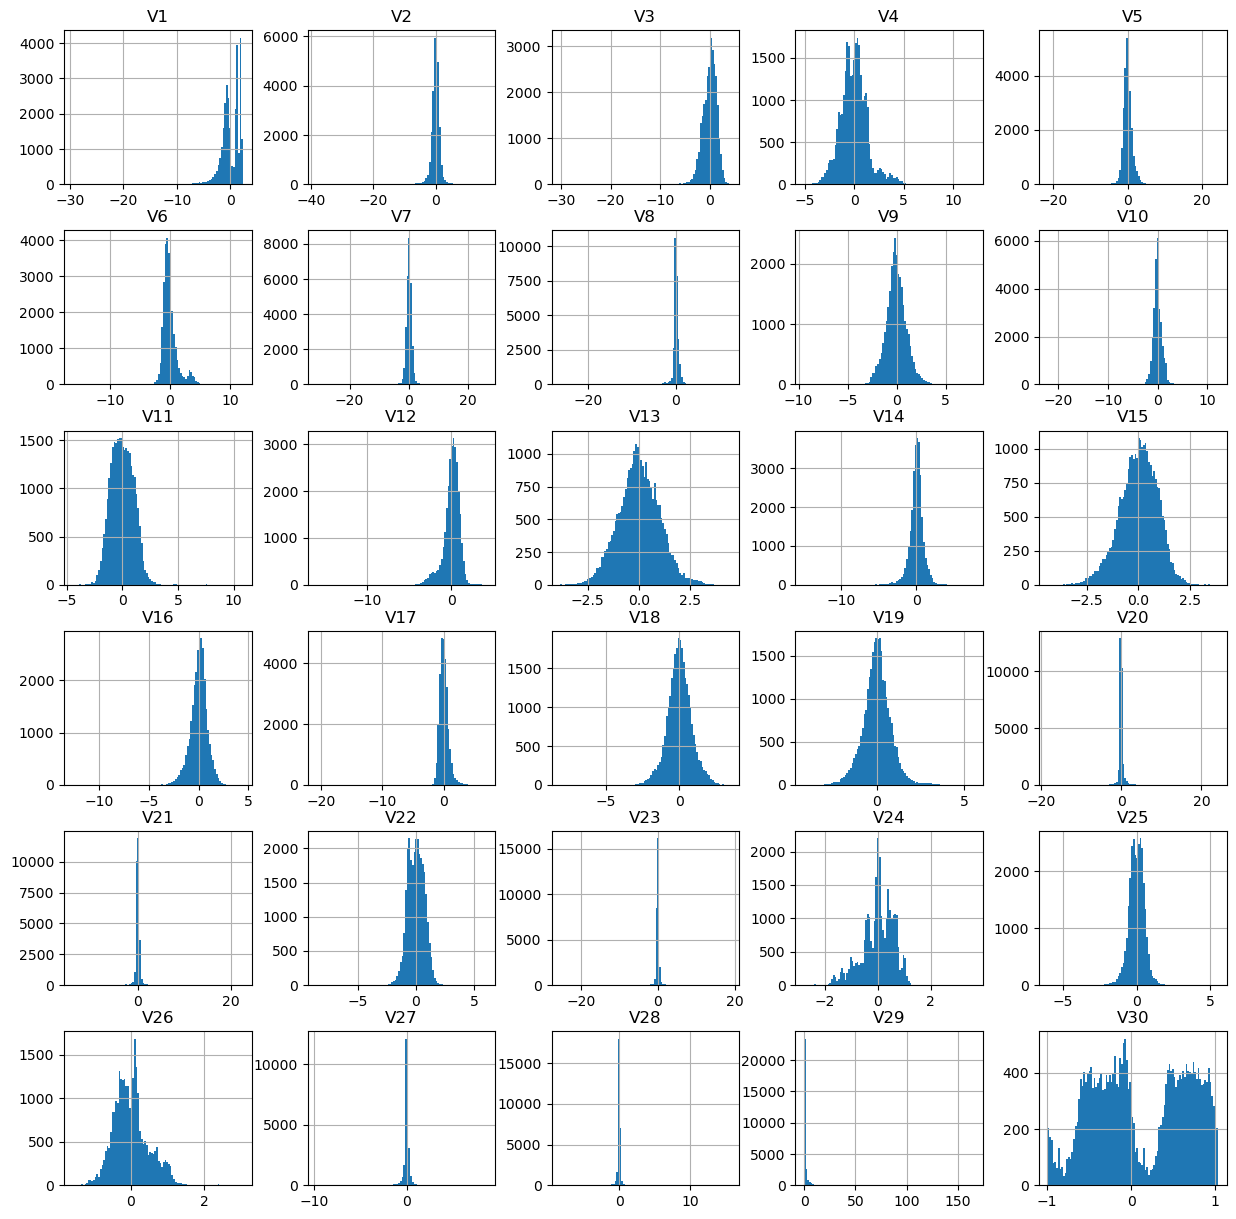

In [10]:
val_df.drop(columns=['ID','Class']).hist(bins=100,figsize=(15,15))
plt.show()

In [15]:
# validation set 사기 거래 비율
val_df['Class'].value_counts()

0    28432
1       30
Name: Class, dtype: int64

In [16]:
val_df['Class'].value_counts()[1]/val_df['Class'].shape[0]

0.0010540369615627855

### (2) 이변량 분석 (숫자 -> 범주) 
feature selection을 위해 상관관계를 분석해보자 
- 시각화 분석 (scatterplot, boxplot, histogram 등) : 범주별로 분포 확인
  - 이상치가 많고 분포가 왜곡되어있는경우 -> **중앙값**이 데이터의 중심 경향성 대표
  - 이상치 영향 적고 분포가 대칭적인 경우 -> **평균**이 데이터의 중심 경향성 대표
  - 범주 별 데이터 분포의 중심값이 비슷하더라도 **분포의 첨예성, 분산**이 범주를 구분하는데 도움이 될 수 있음 
- 통계적 검정
  - One-way ANOVA 분석(일방향 분산분석) : x의 평균이 y의 각 범주에 따라 다른지 검정
  - Kruskal-Wallis 검정 : x가 정규분포를 따르지 않을 경우 사용. 비모수적인 방법으로 여러 그룹의 중앙값 차이를 검정
- 상관분석
  - Point-Biserial Correlate : 연속형 변수 -> 이진 범주형 변수간의 상관관계 측정 (피어슨 상관계수의 변형)
- 모델링(트리 변수중요도)


In [47]:
## 시각화 분석

# 1. val_slice = ID 컬럼제거 , y변수 category 타입으로 변경 
val_slice = val_df.iloc[:,1:].astype({'Class':'category'})
val_slice.head(2)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,Class
0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,-0.255991,-0.994878,0
1,0.962496,0.328461,-0.171479,2.109204,1.129566,1.696038,0.107712,0.521502,-1.191311,0.724396,1.690330,0.406774,-0.936421,0.983739,0.710911,-0.602232,0.402484,-1.737162,-2.027612,-0.269321,0.143997,0.402492,-0.048508,-1.371866,0.390814,0.199964,0.016371,-0.014605,0.168937,-0.994784,0


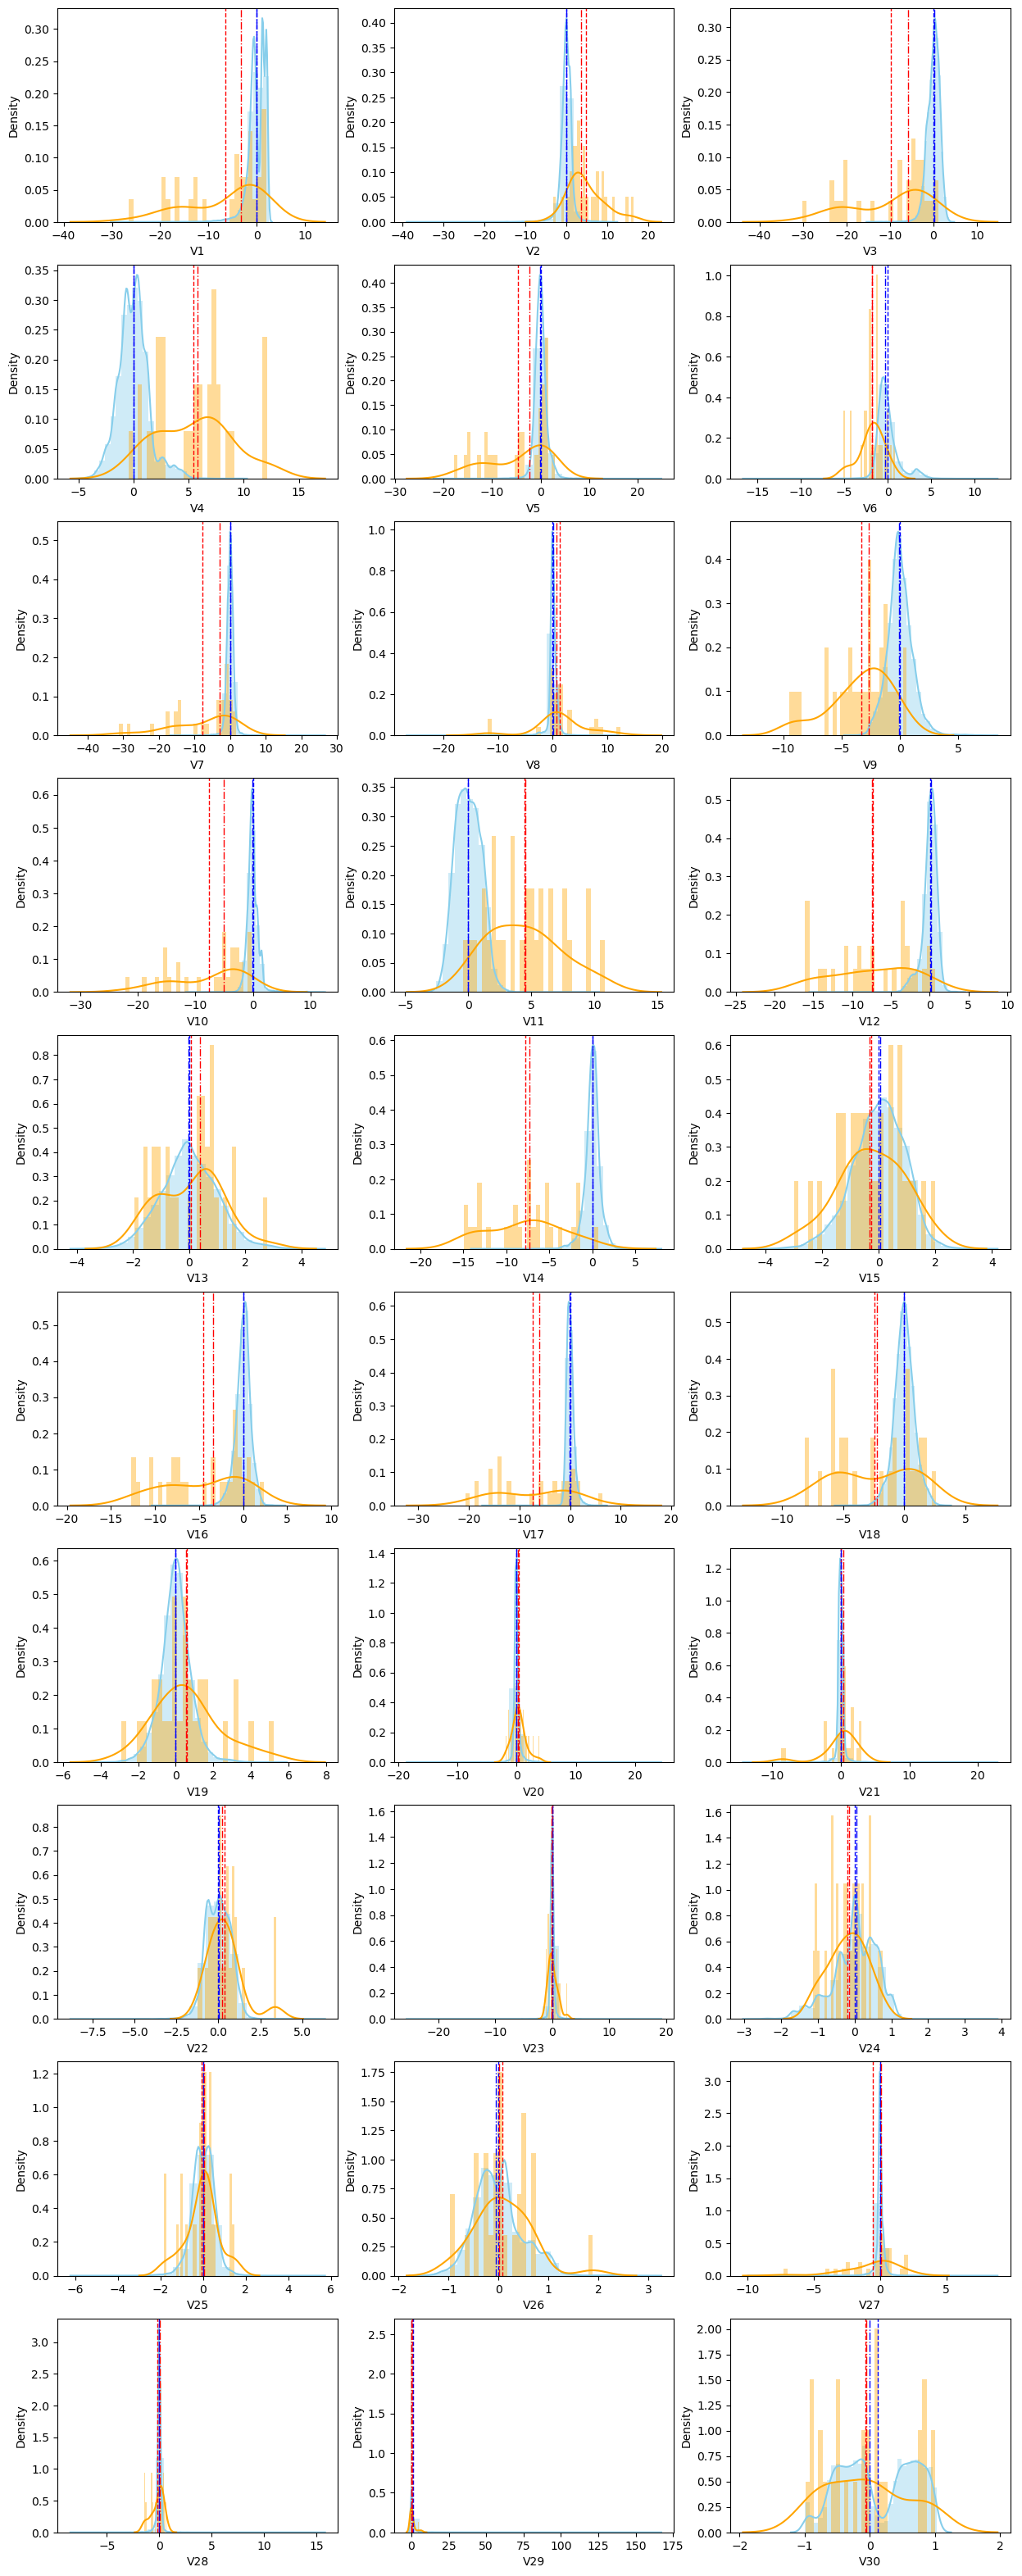

In [80]:


# 2. 각 변수별로 y범주에 따른 histplot+kde 그래프 출력   
nrow = 10
ncol = int(30/nrow)
mean_gap_list = []

fig, ax = plt.subplots(ncols = ncol, nrows = nrow, figsize=(15,4*nrow)) # 전체그림 객체, 하위 그래프 객체(2차원 배열로 접근)

for i, col in enumerate(val_slice.columns[:-1]):
    normal_data = val_slice.loc[val_slice['Class'] == 0, col]
    anomaly_data = val_slice.loc[val_slice['Class'] == 1, col]
    
    #범주별 histplot그래프
    sns.distplot(normal_data, bins=30, color = 'skyblue',label='normal', ax = ax[int(i/ncol) , int(i%ncol)])
    sns.distplot(anomaly_data, bins=30, color = 'orange',label='anomaly', ax = ax[int(i/ncol) , int(i%ncol)])
    
    #평균값
    mean_normal = normal_data.mean()
    mean_anomaly = anomaly_data.mean()
    
    #중앙값
    median_normal = normal_data.median()
    median_anomaly = anomaly_data.median()
    
    #각각 평균값에 세로선 그리기
    ax[int(i/ncol), int(i%ncol)].axvline(mean_normal, color='blue', linestyle='--', linewidth=1) # 평균
    ax[int(i/ncol), int(i%ncol)].axvline(mean_anomaly, color='red', linestyle='--', linewidth=1) 
    ax[int(i/ncol), int(i%ncol)].axvline(median_normal, color='blue', linestyle='-.', linewidth=1) # 중앙값
    ax[int(i/ncol), int(i%ncol)].axvline(median_anomaly, color='red', linestyle='-.', linewidth=1) 
    
    mean_gap_list.append([col, abs(mean_normal-mean_anomaly)])

plt.show()



- feature들은 모두 정규화가 되어있는 상태인듯(normal 평균이 모두 0) 
- normal한 데이터들은 v30 제외하고 대부분 정규분포를 형태를 따름 -> 평균을 대표 중심값으로 
1. 평균 차이 구하기
2. 평균 차이없더라도 첨예성 확인하기

In [89]:
# 평균값 차이 확인
mean_gap_list.sort(key= lambda x:x[1],reverse=True)
mean_gap_df = pd.DataFrame(mean_gap_list,columns=['col','mean_gap'])
mean_gap_df

,col,mean_gap
0,V3,9.814180
1,V14,7.835667
2,V7,7.712986
3,V10,7.580796
4,V17,7.352987
5,V12,7.305109
6,V1,6.502051
7,V4,5.462425
8,V2,4.789603
9,V5,4.618762


In [90]:
# 상관분석

In [ ]:
# feature 선정

## 샘플링 - SMOTE